In [1]:
library(forecast)
library(forecTheta)

Loading required package: parallel
Loading required package: tseries


In [2]:
#d <- read.table(file='NSE-TATAGLOBAL11.csv', header=TRUE, sep=',')
#df <- d[order(as.Date(d$Date, format="%Y-%m-%d"), decreasing = FALSE),]
#rownames(df) <- df$Date
#data.ts<- as.ts(data)

#data <- subset(df, select = c(Date, Close))

#file = "EOD-MSFT.csv"
file = "NSE-TATAGLOBAL11.csv"

data<-read.table(file, sep=",", header=TRUE)
data <- data[order(as.Date(data$Date, format="%Y-%m-%d"), decreasing = FALSE),]
data.ts<- as.ts(subset(data, select=-Date))

In [ ]:
shift <- function(x, lag=1) {
    n <- length(x)
    xnew <- rep(NA, n)
    if (lag < 0) {
        xnew[1:(n-abs(lag))] <- x[(abs(lag)+1):n]
    } else if (lag > 0) {
        xnew[(lag+1):n] <- x[1:(n-lag)]
    } else {
        xnew <- x
    }
    return(xnew)
}

### Differentiation

In [ ]:
for (i in 1:length(data[,1])-1){
  data[i,'Return'] <- (data[i+1,'Close'] - data[i,'Close']) / data[i,'Close']
}

In [ ]:
data

In [3]:
startAt <- 980
stopAt <- length(data[,1])

col <- 'Close'
#col <- 'Return'

In [4]:
forecast_thetaf = thetaf(ts(data[1:startAt-1, col], frequency=30), h=stopAt-startAt)
forecast_otm = otm(ts(data[1:startAt-1, col], frequency=30), h=stopAt-startAt)
forecast_dotm = dotm(ts(data[1:startAt-1, col], frequency=30), h=stopAt-startAt)
forecast_stm = stm(ts(data[1:startAt-1, col], frequency=30), h=stopAt-startAt)
forecast_dstm = dstm(ts(data[1:startAt-1, col], frequency=30), h=stopAt-startAt)
forecast_stheta = stheta(ts(data[1:startAt-1, col], frequency=30), h=stopAt-startAt)

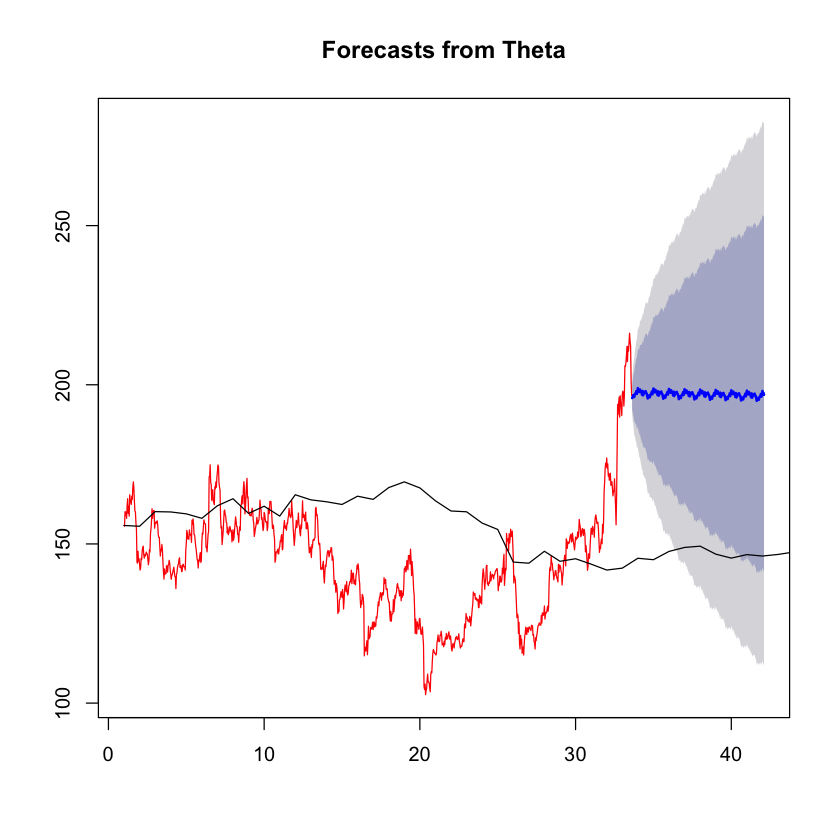

In [5]:
plot(forecast_thetaf, col="red")
lines(data['Close'])

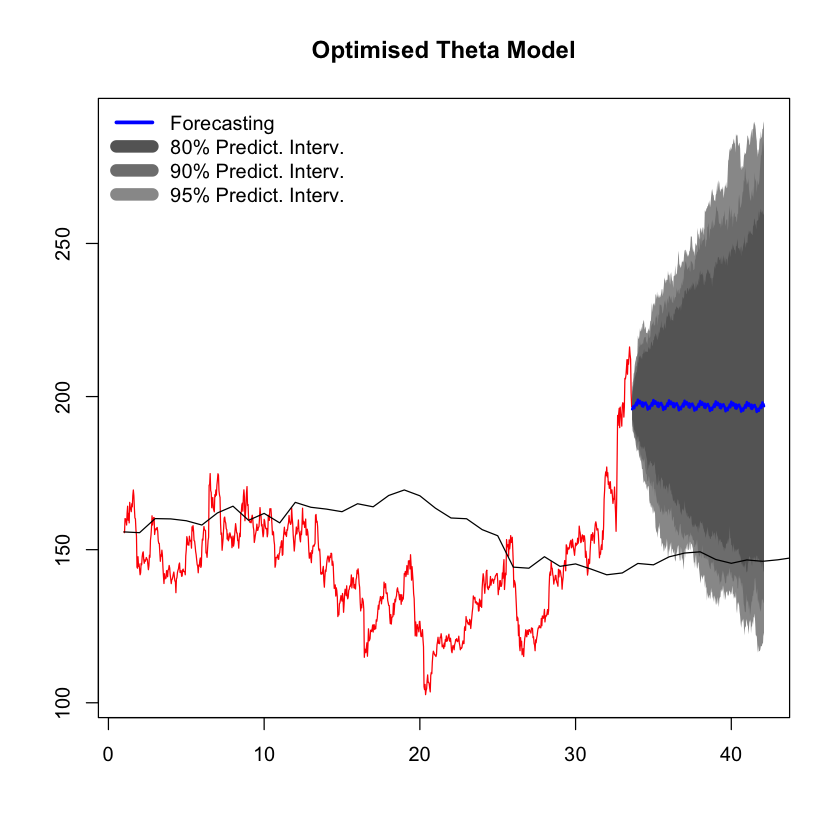

In [6]:
plot(forecast_otm, col="red")
lines(data['Close'])

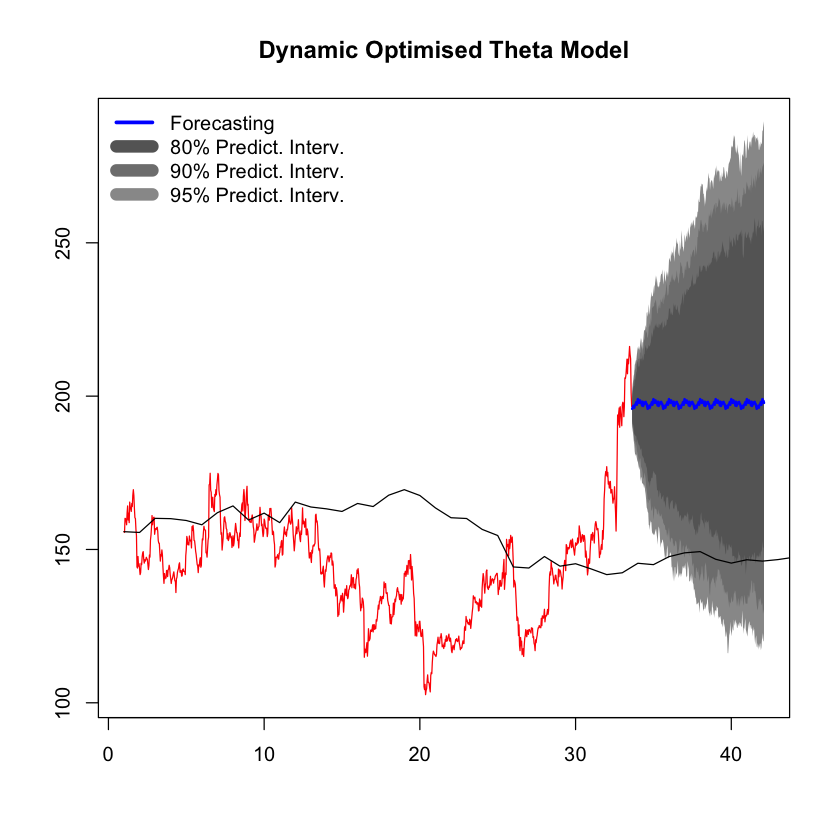

In [7]:
plot(forecast_dotm, col="red")
lines(data['Close'])

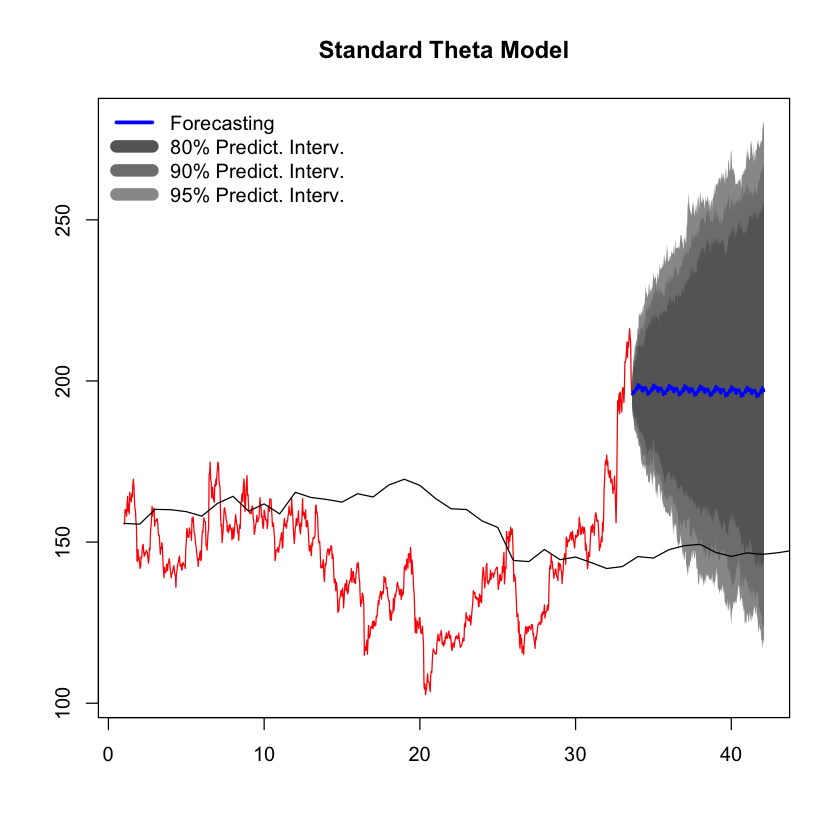

In [8]:
plot(forecast_stm, col="red")
lines(data['Close'])

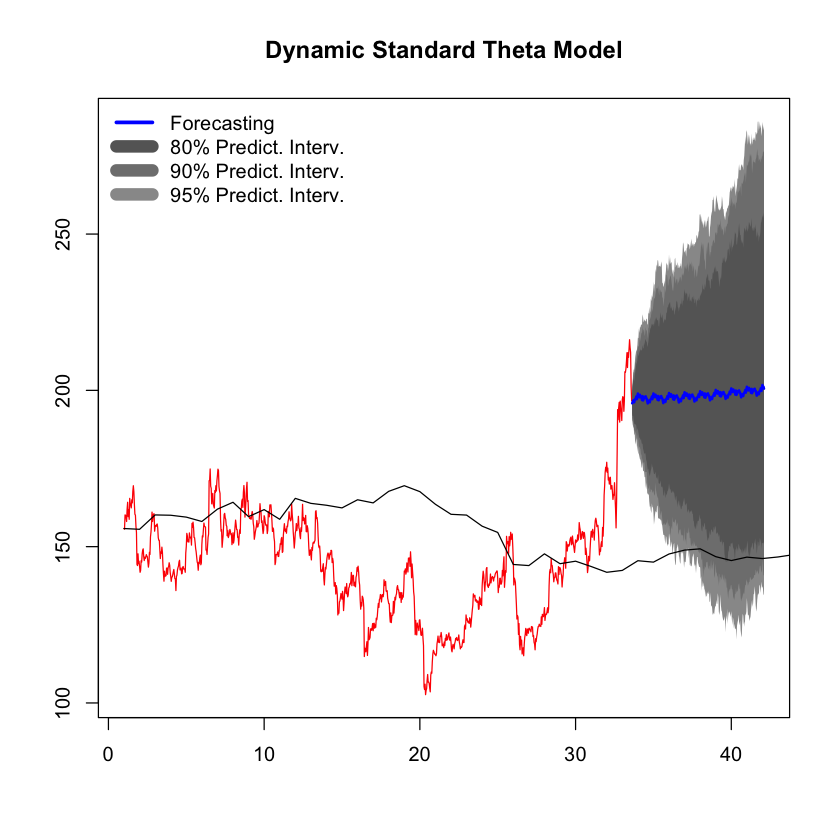

In [9]:
plot(forecast_dstm, col="red")
lines(data['Close'])

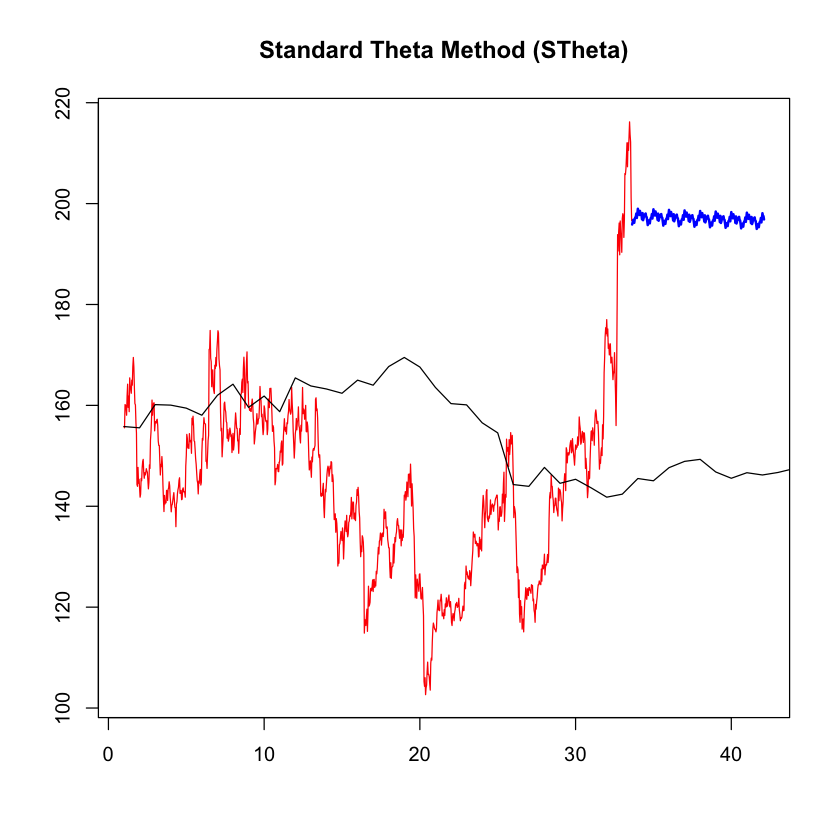

In [10]:
plot(forecast_stheta, col="red")
lines(data['Close'])